# Effect of sinking velocity on differential sedimentation

Coagulation based differential sedimentation is strongly dependant on the settling velocity of the particles.
However, the mechanisms that determine the settling velocity are generally not well understood as aggregates are highly diverse.
Here we will compare the settling velocities predicted by different models to the experimental data.
In particular the sinking velocity used in [Jackson and Lochman (1992)](https://doi.org/10.4319/lo.1992.37.1.0077)
will be compared to the sinking velocities described in [Kriest (2002)](https://doi.org/10.1016/S0967-0637(02)00127-9).


In [1]:
from coagulation_model.coagulation_kernel import CoagulationKernel as kernel
from coagulation_model.particle_size_distribution import ParticleSizeDistribution as psd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('notebook')

In [2]:
kriest_dense_kernel = kernel(
    list_of_applied_kernels=[
        # 'rectilinear_shear',
        'rectilinear_differential_sedimentation'],
    settling_function='settling_velocity_kriest_dense_aggregate'
    )

jackson_lochmann_kernel = kernel(
    list_of_applied_kernels=[
        # 'rectilinear_shear',
        'rectilinear_differential_sedimentation'],
    settling_function='settling_velocity_jackson_lochmann_fractal'
    )

In [3]:
radius = np.linspace(1e-6,1e-3,100)

volume = 4/3*np.pi*radius**3

v_dense = kriest_dense_kernel.settling_velocity_kriest_dense_aggregate(volume)
v_porous = kriest_dense_kernel.settling_velocity_kriest_porous_aggregate(volume)
v_jackson = jackson_lochmann_kernel.settling_velocity_jackson_lochmann_fractal(volume)


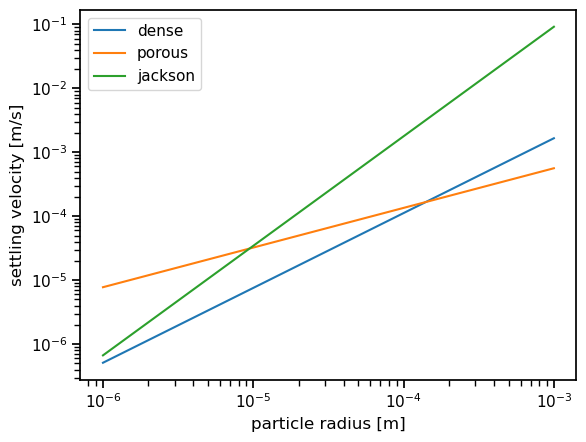

In [4]:
# plot the settling velocity

fig,ax = plt.subplots()
ax.plot(radius,v_dense, label='dense')
ax.plot(radius,v_porous, label='porous')
ax.plot(radius,v_jackson, label='jackson')
ax.set_xlabel('particle radius [m]')
ax.set_ylabel('settling velocity [m/s]')

ax.set_yscale('log')
ax.set_xscale('log')

ax.legend()

In [5]:
radius_i = np.linspace(1e-6,1e-4,100000)
radius_j = 1e-5


volume_i = 4/3*np.pi*radius_i**3
volume_j = 4/3*np.pi*radius_j**3

delta_v_kriest_dense = np.abs(
    kriest_dense_kernel.settling_velocity_kriest_dense_aggregate(volume_i) - kriest_dense_kernel.settling_velocity_kriest_dense_aggregate(volume_j)
)

delta_v_kriest_porous = np.abs(
    kriest_dense_kernel.settling_velocity_kriest_porous_aggregate(volume_i) - kriest_dense_kernel.settling_velocity_kriest_porous_aggregate(volume_j)
)


delta_v_jackson = np.abs(
    jackson_lochmann_kernel.settling_velocity_jackson_lochmann_fractal(volume_i) - jackson_lochmann_kernel.settling_velocity_jackson_lochmann_fractal(volume_j)
)


Text(0.5, 1.0, 'Coagulation kernel for 1e-5 m particle')

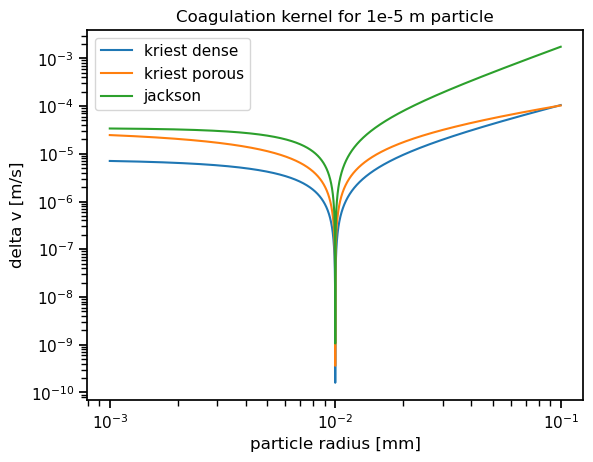

In [6]:
fig,ax = plt.subplots()
ax.plot(radius_i*1e3,delta_v_kriest_dense, label='kriest dense')
ax.plot(radius_i*1e3,delta_v_kriest_porous, label='kriest porous')
ax.plot(radius_i*1e3,delta_v_jackson, label='jackson')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('particle radius [mm]')
ax.set_ylabel('delta v [m/s]')
ax.legend()
ax.set_title('Coagulation kernel for 1e-5 m particle')